In [1]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam


In [3]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=(256, 256, 3),kernel_regularizer=l2(l2=0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(5, 5), padding='valid', activation='relu',kernel_regularizer=l2(l2=0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('/content/gdrive/Othercomputers/My Laptop/vdfv/data1/train',
                                                 target_size = (256, 256),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory('/content/gdrive/Othercomputers/My Laptop/vdfv/data1/test',
                                            target_size = (256, 256),
                                            batch_size = 4,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [9]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from livelossplot import PlotLossesKerasTF


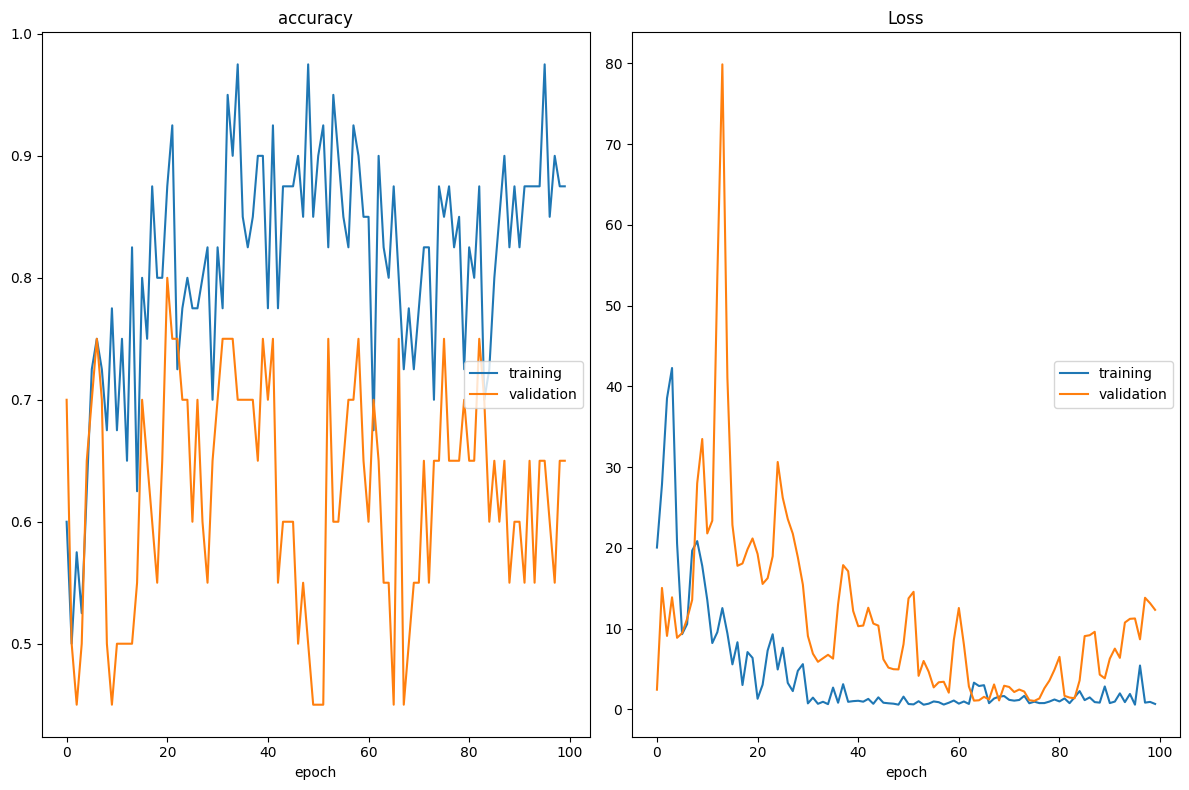

accuracy
	training         	 (min:    0.500, max:    0.975, cur:    0.875)
	validation       	 (min:    0.450, max:    0.800, cur:    0.650)
Loss
	training         	 (min:    0.566, max:   42.275, cur:    0.661)
	validation       	 (min:    1.036, max:   79.890, cur:   12.319)
10/10 [==============================] - 2s 171ms/step - loss: 0.6609 - accuracy: 0.8750 - val_loss: 12.3194 - val_accuracy: 0.6500


In [11]:

model.fit(training_set,epochs=100,verbose=1,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


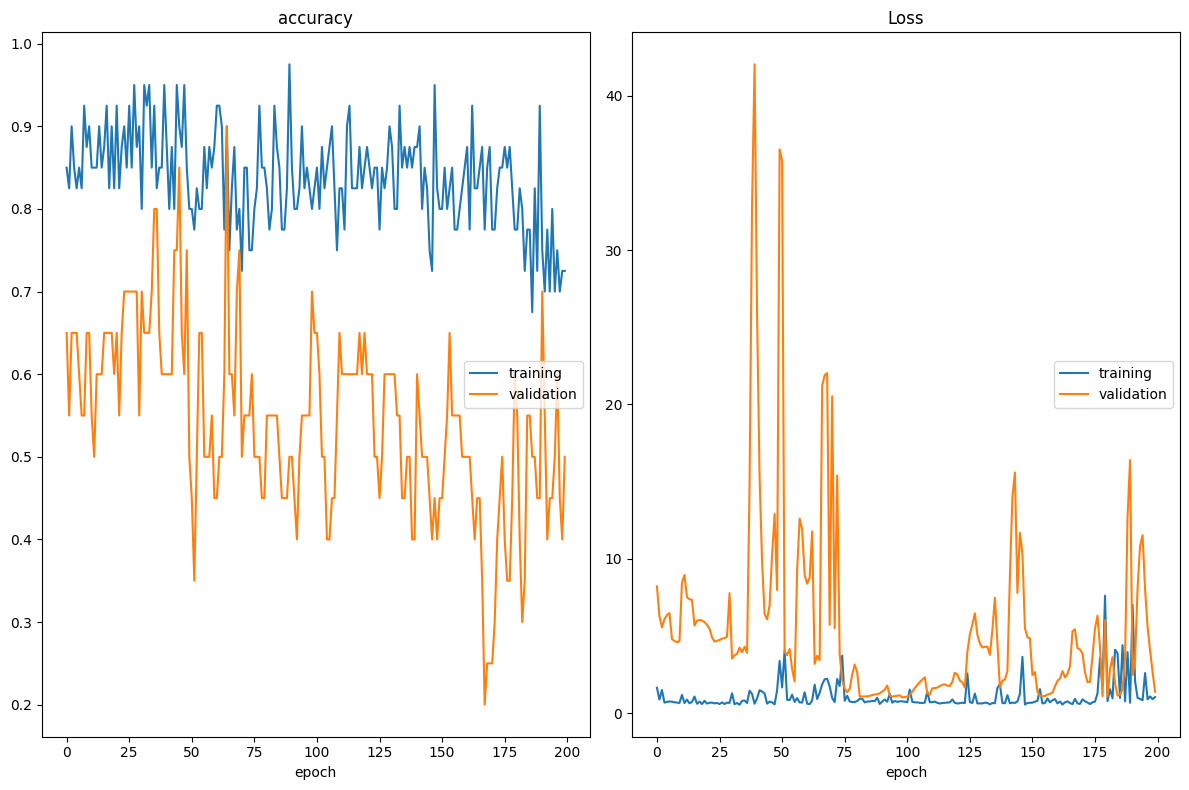

accuracy
	training         	 (min:    0.675, max:    0.975, cur:    0.725)
	validation       	 (min:    0.200, max:    0.900, cur:    0.500)
Loss
	training         	 (min:    0.539, max:    7.605, cur:    1.036)
	validation       	 (min:    1.010, max:   42.043, cur:    1.383)
10/10 [==============================] - 1s 144ms/step - loss: 1.0364 - accuracy: 0.7250 - val_loss: 1.3829 - val_accuracy: 0.5000


In [12]:

model.fit(training_set,epochs=200,validation_data = test_set,verbose=1,callbacks=[PlotLossesKerasTF()])


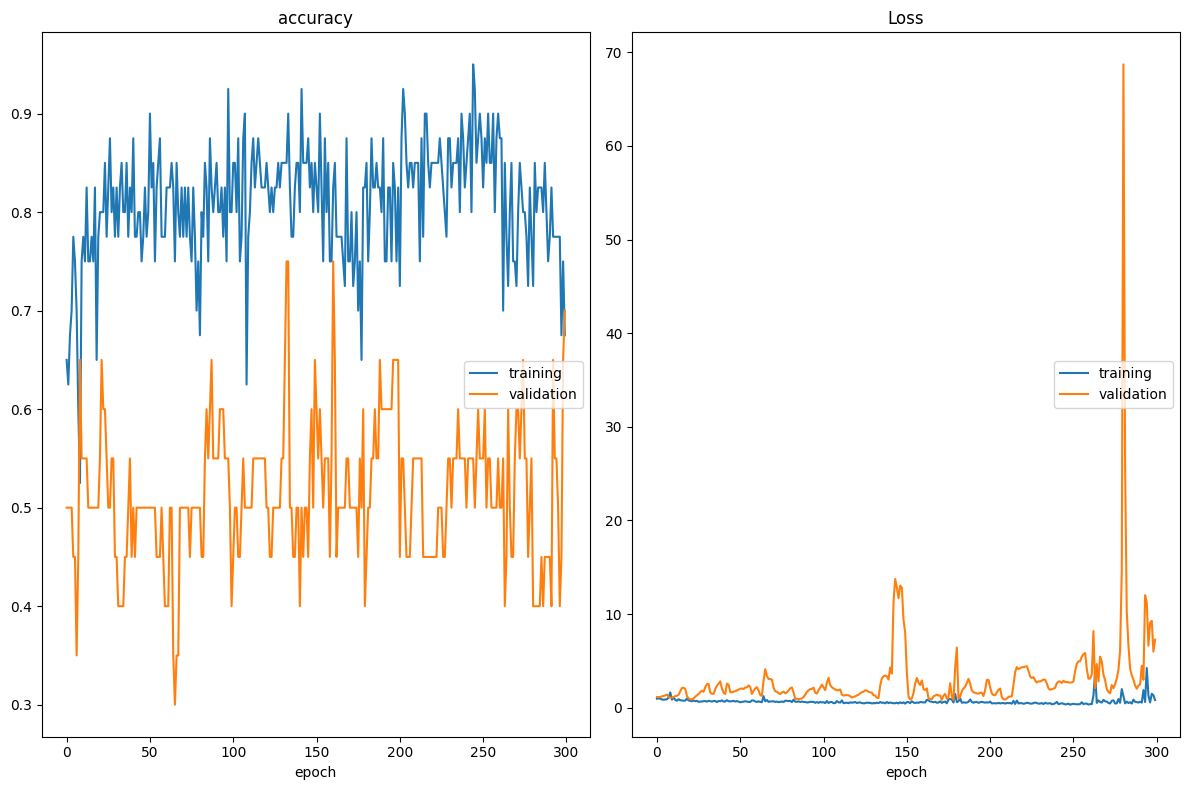

accuracy
	training         	 (min:    0.525, max:    0.950, cur:    0.675)
	validation       	 (min:    0.300, max:    0.750, cur:    0.700)
Loss
	training         	 (min:    0.326, max:    4.240, cur:    0.825)
	validation       	 (min:    0.848, max:   68.709, cur:    7.278)
10/10 [==============================] - 1s 144ms/step - loss: 0.8250 - accuracy: 0.6750 - val_loss: 7.2777 - val_accuracy: 0.7000


In [13]:

model.fit(training_set,epochs=300,validation_data = test_set,verbose=1,callbacks=[PlotLossesKerasTF()])


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [17]:

test_image = image.load_img('/content/images_2.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)


if result[0][0] == 1: 
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 27ms/step
cat


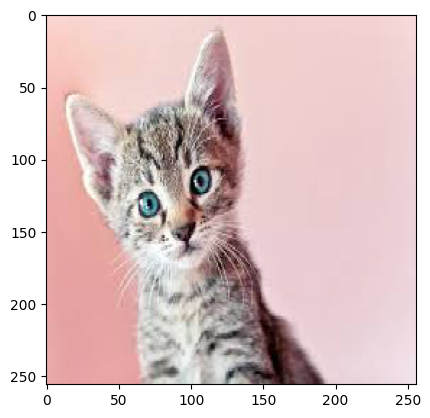

In [18]:
test_image = image.load_img('/content/images_2.jpg',target_size=(256,256))
plt.imshow(test_image)

In [19]:
# Saving the model
model.save("model.h5")